### Basics to Begin

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2-4*x+5

In [3]:
f(3.0)

20.0

In [4]:
xs = np.arange(-5,5,0.25)

In [5]:
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [6]:
ys = f(xs)

In [7]:
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

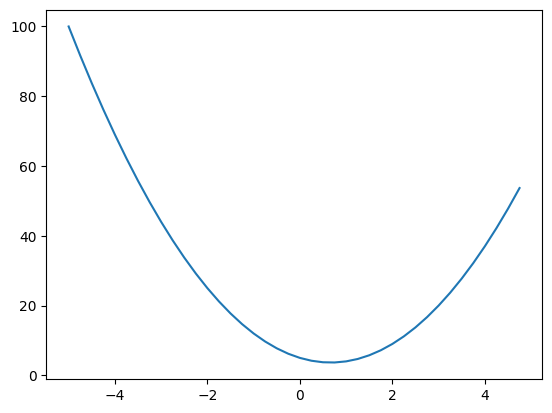

In [8]:
plt.plot(xs,ys)

In [9]:
h = 0.001
x = 3 
(f(x+h)-f(x))/h

14.00300000000243

In [10]:
# inputs 
a = 2
b = -3
c = 10

h = 0.0001

d1 = a*b + c
c += h
d2 = a*b +c 

print("d1", d1)
print("d2", d2)
print("slope", (d2-d1)/h)


d1 4
d2 4.0001
slope 0.9999999999976694


### Class Value

In [10]:
class Value:
    def __init__(self, data, _children=(), _op ="", label =""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")
        return out

    def tanh(self):
        x = self.data 
        out = Value((math.exp(2*x)-1)/(math.exp(2*x)+1), (self,), "tanh")
        return out

In [9]:
math.exp(2)

7.38905609893065

In [4]:
a = Value(2, label = "a")
b = Value(-3, label ="b")
e = a*b; e.label = "e"
c = Value(10, label = "c")

d = e+c; d.label = 'd'
f = Value(-2.0, label = "f")
L = d*f; L.label = "L"
# as we have defined the double underscore functions we can just do a*b+c  instead of 
#a.__mul__(b).__add__(c)

In [24]:
d._prev

{Value(data=-6), Value(data=10)}

In [25]:
d._op

'+'

### Graphing for visualization

In [12]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    nodes, edges = trace(root)

    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

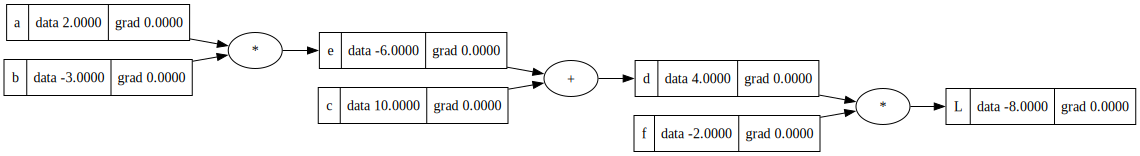

In [8]:
draw_dot(L)

### Building a Neuron and back propograting manually

In [17]:
# inputs to the neuron
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")
# weigths of the neuron 
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")

# bias of the neuron 
b = Value(6.8813735870195432, label = "b")

# forward pass of nueron(x1w1 + x2w2 +b)
x1w1 = x1*w1; x1w1.label = "x1w1"
x2w2 = x2*w2; x2w2.label = "x2w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1+x2w2"
n = x1w1x2w2 + b; n.label = "n"

#activation funtion tanh 
o = n.tanh() ; o.label = "o"

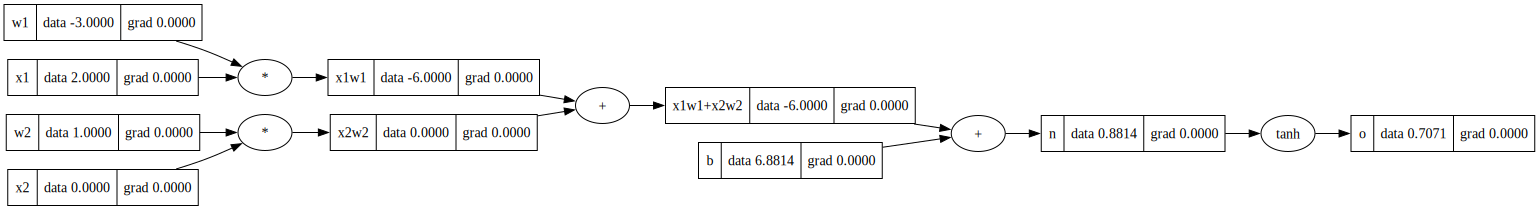

In [18]:
draw_dot(o)

In [ ]:
# manual backpropogation 

# o = tanh(n)
# do/dn = 1-tanh(n)**2 
# do/dn = 1-o**2
n.grad = 1 - o.data**2

#grads
o.grad = 1
n.grad = 0.5
b.grad = 0.5
x1w1x2w2.grad = 0.5
x1w1.grad = 0.5
x2w2.grad = 0.5

x1.grad = x1w1.grad * w1.data
w1.grad = x1w1.grad * x1.data
x2.grad = x2w2.grad * w2.data
w2.grad = x2w2.grad * x2.data

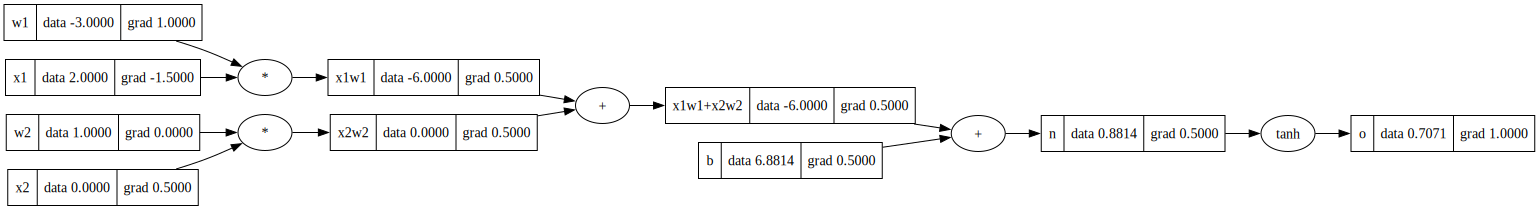

In [25]:
draw_dot(o)

### Implementing Auto backward pass 

In [ ]:
class Value:
    """
    A value can be created by an operation between two values or created by definition 
    data : The numerical value it stores 
    grad : The local derivative 
    _backward : A function to propogate gradients to children nodes. 
                Initialised to empty function, if value object has no children 
    _prev : Initialized empty, if created by definition 
            Set to list(value objects being operated), if created by operation
    _op : Initialized empty, if created by definition
          Set to operation, if created by operation
    label: A label for visualising
    """
    def __init__(self, data, _children=(), _op ="", label =""):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op 
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        def _backward():
            # update self.grad and other.grad
            self.grad = out.grad * 1
            other.grad = out.grad * 1
        # assign the _backward function to be the _backward function of created value function 
        out._backward = _backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")
        def _backward():
            # update self.grad and other.grad
            self.grad = out.grad * other.data
            other.grad = out.grad * self.data
        # assign the _backward function to be the _backward function of created value function 
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data 
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self,), "tanh")
        def _backward():
            # update self.grad
            self.grad = (1 - t**2) * out.grad
        # assign the _backward function to be the _backward function of created value function 
        out._backward = _backward
        return out

In [50]:
### Build a Nueron
# inputs to the neuron
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")
# weigths of the neuron 
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")

# bias of the neuron 
b = Value(6.8813735870195432, label = "b")

# forward pass of nueron(x1w1 + x2w2 +b)
x1w1 = x1*w1; x1w1.label = "x1w1"
x2w2 = x2*w2; x2w2.label = "x2w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1+x2w2"
n = x1w1x2w2 + b; n.label = "n"

#activation funtion tanh 
o = n.tanh() ; o.label = "o"

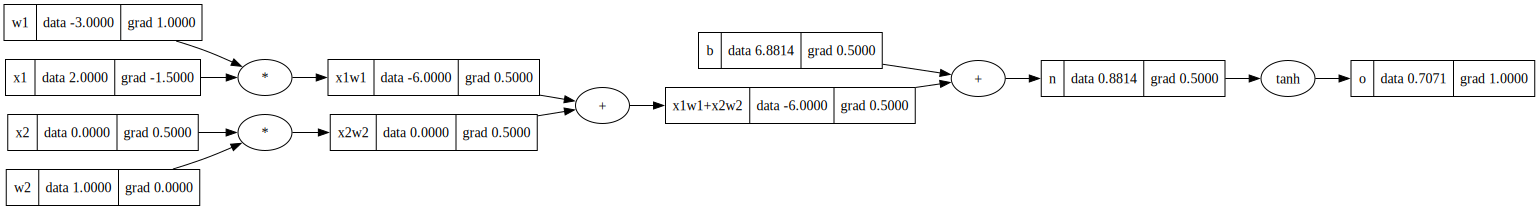

In [53]:
draw_dot(o)

In [ ]:
o.grad =1
# call back ward functions in reverse order
o._backward()
n._backward()
x1w1x2w2._backward()
b._backward()
x1w1._backward()
x2w2._backward()

In [49]:
# topological sort
# arrange the nodes in order that everything after the node is computed before we we call backward on the node 

topo = []
visited = set()

def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)

build_topo(o)
topo

[Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [52]:
o.grad = 1

topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)

# build topo of o 
build_topo(o)
for node in reversed(topo):
    node._backward()


### Cleaning this up until here !!!

In [1]:
# adding this into Value class
import math 
class Value:
    """
    A value can be created by an operation between two values or created by definition 
    data : The numerical value it stores 
    grad : The local derivative 
    _backward : A function to propogate gradients to children nodes. 
                Initialised to empty function, if value object has no children 
    _prev : Initialized empty, if created by definition 
            Set to list(value objects being operated), if created by operation
    _op : Initialized empty, if created by definition
          Set to operation, if created by operation
    label: A label for visualising


    Fucntions:
    __neg__, __sub__, __rmul__, __truediv__ are included to support operations like 
    -1*Value 
    Value - 1 
    2*Value 
    Value/3

    """
    def __init__(self, data, _children=(), _op ="", label =""):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op 
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), "+")
        def _backward():
            # update self.grad and other.grad
            self.grad += out.grad * 1
            other.grad += out.grad * 1
        # assign the _backward function to be the _backward function of created value function 
        out._backward = _backward
        return out

    def __radd__(self, other):
        return self + other 

    def __neg__(self):# -self
        return self*-1
    
    def __sub__(self,other): # self - other
        return self + (-other)
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), "*")
        def _backward():
            # update self.grad and other.grad
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data
        # assign the _backward function to be the _backward function of created value function 
        out._backward = _backward
        return out
    
    def __rmul__(self,other): # other*self
        return self * other

    def __pow__(self, other): # self ** other , other is usually a constant(int or float not value) and not trainable
        assert isinstance(other, (int,float)), "only support pow of int/float now"
        out = Value(self.data**other, (self,), f'**{other}')
        def _backward():
            # update self.grad
            self.grad += other * self.data**(other-1) * out.grad
        out._backward = _backward
        return out

    def __truediv__(self,other): # self/other
        return self * other**-1

    def tanh(self):
        x = self.data 
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self,), "tanh")
        def _backward():
            # update self.grad
            self.grad += (1 - t**2) * out.grad
        # assign the _backward function to be the _backward function of created value function 
        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), "exp")
        def _backward():
            #update self.grad 
            self.grad += out.data * out.grad
        out._backward = _backward
        return out

    def backward(self):
        # topological sort
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        # update grad to 1        
        self.grad = 1
        # build topo of self
        build_topo(self)
        for node in reversed(topo):
            node._backward()


In [2]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    nodes, edges = trace(root)

    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [77]:
### Build a Nueron
# inputs to the neuron
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")
# weigths of the neuron 
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")

# bias of the neuron 
b = Value(6.8813735870195432, label = "b")

# forward pass of nueron(x1w1 + x2w2 +b)
x1w1 = x1*w1; x1w1.label = "x1w1"
x2w2 = x2*w2; x2w2.label = "x2w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1+x2w2"
n = x1w1x2w2 + b; n.label = "n"

#activation funtion tanh 
o = n.tanh() ; o.label = "o"

# backward pass
o.backward()

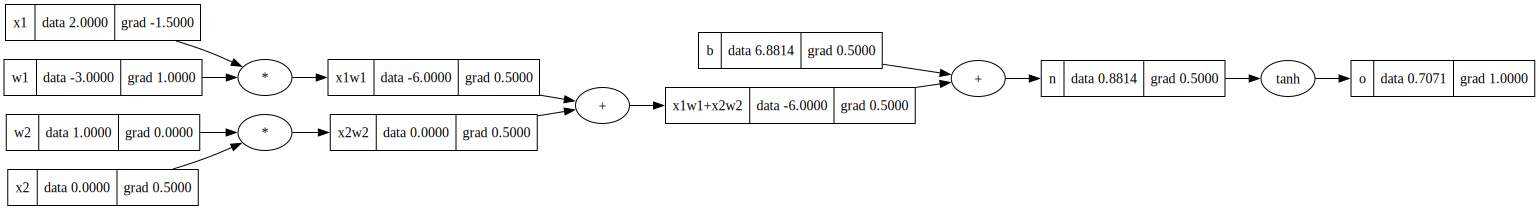

In [78]:
draw_dot(o)

Breaking Tanh into indivitual operations 

In [79]:
### Build a Nueron
# inputs to the neuron
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")
# weigths of the neuron 
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")

# bias of the neuron 
b = Value(6.8813735870195432, label = "b")

# forward pass of nueron(x1w1 + x2w2 +b)
x1w1 = x1*w1; x1w1.label = "x1w1"
x2w2 = x2*w2; x2w2.label = "x2w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1+x2w2"
n = x1w1x2w2 + b; n.label = "n"

#activation funtion tanh 
e = (2*n).exp()
o = (e-1) / (e+1) 

# backward pass
o.backward()

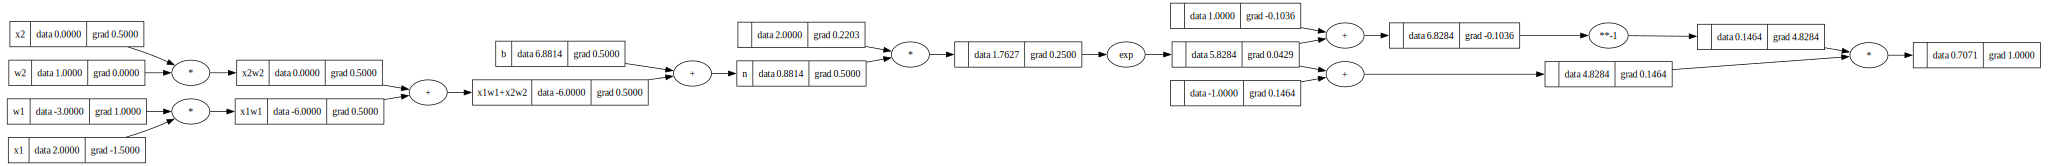

In [80]:
draw_dot(o)

### Implementation in Pytorch

In [90]:
import torch

In [ ]:
### Build a Nueron
# inputs to the neuron
x1 = torch.Tensor([2.0]).double() ;x1.requires_grad = True
x2 = torch.Tensor([0.0]).double() ;x2.requires_grad = True

# weigths of the neuron 
w1 = torch.Tensor([-3.0]).double() ;w1.requires_grad = True
w2 = torch.Tensor([1.0]).double() ;w2.requires_grad = True


# bias of the neuron 
b = torch.Tensor([6.8813735870195432]).double() ;b.requires_grad = True

# forward pass of nueron(x1w1 + x2w2 +b)
n = x1*w1 + x2*w2 + b

#activation funtion tanh 
o = torch.tanh(n) 

print(f"value of o after forward pass {o.data.item()}")

# backward pass
o.backward()

print(f"Grad of w1:{w1.grad.item()}")
print(f"Grad of w2:{w2.grad.item()}")
print(f"Grad of x1:{x1.grad.item()}")
print(f"Grad of x2:{x2.grad.item()}")

value of o after forward pass 0.7071066904050358
Grad of w1:1.0000002567688737
Grad of w2:0.0
Grad of x1:-1.5000003851533106
Grad of x2:0.5000001283844369


In [87]:
x1.data.dtype

torch.float32

### Building a Neural Net (MLP)

In [158]:
# running this would reinitialize the network
import random

class Neuron:

    def __init__(self, nin):# no of inputs
        # weigths and bias 
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        # in python __call__ will execute n(x) , when n => neuron object
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]

class Layer: 
    """ 
    List of neurons
    nin: no of weigths in one neuron => input dimension
    nout: no of neurons firing with input 
    
    returns : list of neuron output
    """
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs)==1 else outs

    def parameters(self):
        # simpler implementation
        # params = []
        # for neuron in self.neurons:
        #     ps = neuron.parameters()
        #     params.extend(ps)
        # return params
        return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
    """
    sequential list of layers 
    nin: input dimension
    nouts : list of outs of layers 
    ex : [4,4,1]
    Means this MLP has 3 layers having 4 , 4 , 1 nueron respectively  

    return: list of neuron outputs from last layer 
    """
    def __init__(self, nin, nouts):
        # Neuron(no of inputs)
        # Layer(no of input of each Neuron, no of neuron)
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        #pass the ouputs sequentially through the layers
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [159]:
#x = [2.0, 3.0]
#n = Neuron(2)
#n(x)

#l = Layer(2,3)
#l(x)

x = [2.0, 3.0, 4.0]
n = MLP(3,[4,4,1])
n(x)

Value(data=-0.11923054277728928)

In [160]:
len(n.parameters())

41

In [ ]:
draw_dot(mlp(x))

#### Building a toy example

In [109]:
## Toy example 
xs = [
    [2.0, 3.0, -1.0 ],
    [3.0, -1.0, 0.5 ],
    [0.5, 1.0, 1.0 ],
    [1.0, 1.0, -1.0 ],
]

# ground truth 
ys = [1.0, -1.0, -1.0, 1.0]

In [155]:
# forward pass backward pass and upadte 
for k in range(20):
    #forward pass
    y_pred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt,yout in zip(ys, y_pred))

    # backward pass
    for param in n.parameters():
        param.grad = 0.0
    loss.backward()

    # update the paramters 
    for param in n.parameters():
        # decrease it by a small step size(learning rate) 
        param.data += -0.05 * param.grad

    print(k , loss.data)

0 0.0008871941506753975
1 0.0008859971611840998
2 0.0008848032194831632
3 0.0008836123143548249
4 0.0008824244346350724
5 0.0008812395692133052
6 0.0008800577070320397
7 0.0008788788370865782
8 0.0008777029484247172
9 0.0008765300301464082
10 0.0008753600714035028
11 0.0008741930613993934
12 0.0008730289893887533
13 0.00087186784467721
14 0.0008707096166210797
15 0.0008695542946270312
16 0.0008684018681518126
17 0.0008672523267019879
18 0.0008661056598335829
19 0.0008649618571518528


In [106]:
#n.layers[0].neurons[0].w[0].grad
#n.layers[0].neurons[0].w[0].data